# Word Frequency and Collocation Analysis


### Preprocessing 

In [178]:
#Set random seed for reproduction of code. 
import numpy as np
np.random.seed(42)

#Change working directory to where corpus is located. 
import os
os.chdir("/Users/vickijtruong/Documents/DH199/Corpus")
all_files = os.listdir("/Users/vickijtruong/Documents/DH199/Corpus")
all_files.sort()
all_files.pop(0)
#print(all_files)
len(all_files)

295

In [179]:
import nltk
from nltk.corpus import stopwords 
#Import stop words. 
stop_words = stopwords.words('english')

#If you would like to add or remove stopwords, uncomment the code: 
#more_stop = ['']
#stop_words = stop_words + more_stop

#not_stopwords = [''] 
#stop_words = set([word for word in stop_words if word not in not_stopwords])
#print(stop_words)

In [180]:
from nltk.tokenize import word_tokenize 
import string

#Read each file into the working directory. Remove stop words, non-alphabetical terms, and punctuation. Append each processed file into the docs list. 
docs = []

for file in all_files:
    with open(file,'r') as f:
        text = f.read()        
        tokenized = word_tokenize(text)
        filtered = [w for w in tokenized if not w in stop_words and w.isalpha()] 
        table = str.maketrans('', '', string.punctuation)
        stripped = [w.translate(table) for w in filtered]
        stripped = list(filter(None, stripped))
        docs.append(stripped)
        
#print(docs)
print(len(docs))

#flatten the nested list since docs is a list of lists
flattened_docs = [y for x in docs for y in x]

295


### Word Frequency 

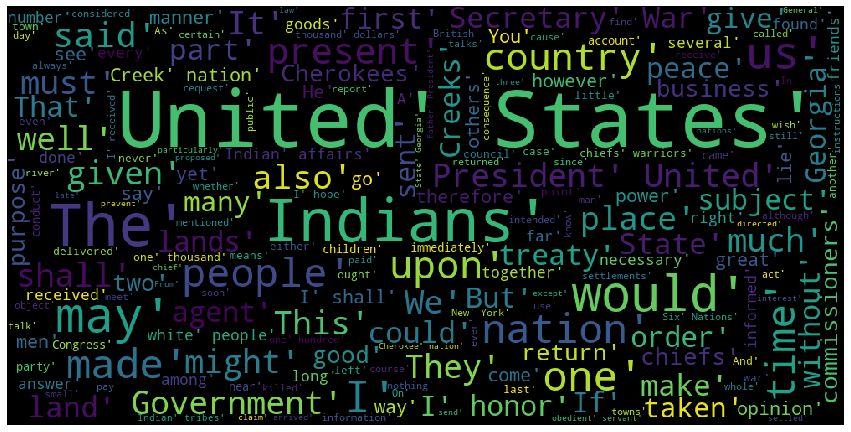

In [181]:
docs = str(docs)
tokens = word_tokenize(docs)
text = nltk.Text(tokens)

#word cloud 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

wordcloud = WordCloud(width = 1000, height = 500).generate(docs)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.close()

In [182]:
from nltk import FreqDist

#frequency distribution
fdist1 = FreqDist(flattened_docs)
print(fdist1)

<FreqDist with 34690 samples and 1038994 outcomes>


In [183]:
#display the top 50 most frequent terms 
fdist1.most_common(50)

[('I', 18302),
 ('The', 9327),
 ('States', 8748),
 ('Indians', 8714),
 ('United', 8421),
 ('would', 5481),
 ('nation', 5199),
 ('one', 5169),
 ('may', 5168),
 ('shall', 5073),
 ('treaty', 4956),
 ('said', 4865),
 ('Indian', 4465),
 ('us', 4345),
 ('made', 3808),
 ('river', 3541),
 ('people', 3534),
 ('time', 3482),
 ('chiefs', 3334),
 ('upon', 3275),
 ('General', 3239),
 ('President', 3035),
 ('part', 2921),
 ('two', 2749),
 ('country', 2738),
 ('lands', 2723),
 ('We', 2662),
 ('It', 2585),
 ('letter', 2526),
 ('great', 2475),
 ('peace', 2419),
 ('Governor', 2392),
 ('land', 2390),
 ('place', 2381),
 ('Government', 2365),
 ('commissioners', 2338),
 ('State', 2324),
 ('Georgia', 2321),
 ('present', 2261),
 ('hundred', 2251),
 ('day', 2091),
 ('men', 2085),
 ('received', 2085),
 ('also', 2059),
 ('make', 1978),
 ('war', 1936),
 ('In', 1926),
 ('well', 1916),
 ('every', 1914),
 ('tribes', 1905)]

### Bigrams and Trigrams

In [184]:
from nltk.collocations import BigramCollocationFinder 
from nltk.metrics import BigramAssocMeasures 

In [185]:
biagram_collocation = BigramCollocationFinder.from_words(flattened_docs) 
biagram_collocation.nbest(BigramAssocMeasures.likelihood_ratio, 15)

[('United', 'States'),
 ('Secretary', 'War'),
 ('President', 'United'),
 ('Six', 'Nations'),
 ('New', 'York'),
 ('I', 'honor'),
 ('obedient', 'servant'),
 ('Creek', 'nation'),
 ('thousand', 'dollars'),
 ('white', 'people'),
 ('OF', 'WAR'),
 ('chiefs', 'warriors'),
 ('within', 'limits'),
 ('COMMUNICATED', 'TO'),
 ('Do', 'Do')]

In [186]:
from nltk.corpus import stopwords 
  
stopset = set(stopwords.words('english')) 
#Filter out stopwords and tokens less than 3 characters long
filter_stops = lambda w: len(w) < 3 or w in stopset 
  
biagram_collocation.apply_word_filter(filter_stops) 
biagram_collocation.nbest(BigramAssocMeasures.likelihood_ratio, 15) 

[('United', 'States'),
 ('Secretary', 'War'),
 ('President', 'United'),
 ('Six', 'Nations'),
 ('New', 'York'),
 ('obedient', 'servant'),
 ('Creek', 'nation'),
 ('thousand', 'dollars'),
 ('white', 'people'),
 ('chiefs', 'warriors'),
 ('within', 'limits'),
 ('one', 'thousand'),
 ('Governor', 'Blount'),
 ('Great', 'Spirit'),
 ('North', 'Carolina')]

In [187]:
from nltk.collocations import TrigramCollocationFinder 
from nltk.metrics import TrigramAssocMeasures 

stopset = set(stopwords.words('english')) 
filter_stops = lambda w: len(w) < 3 or w in stopset

trigram_collocation = TrigramCollocationFinder.from_words(flattened_docs) 
trigram_collocation.apply_word_filter(filter_stops) 
trigram_collocation.apply_freq_filter(3) 
trigram_collocation.nbest(TrigramAssocMeasures.likelihood_ratio, 15) 

[('President', 'United', 'States'),
 ('United', 'States', 'America'),
 ('citizens', 'United', 'States'),
 ('Senate', 'United', 'States'),
 ('part', 'United', 'States'),
 ('independence', 'United', 'States'),
 ('commissioners', 'United', 'States'),
 ('behalf', 'United', 'States'),
 ('Government', 'United', 'States'),
 ('ceded', 'United', 'States'),
 ('United', 'States', 'agree'),
 ('cede', 'United', 'States'),
 ('friendship', 'United', 'States'),
 ('limits', 'United', 'States'),
 ('plenipotentiary', 'United', 'States')]

### Ngrams with "I" as a Member

In [188]:
import nltk
from nltk.collocations import *

finder = BigramCollocationFinder.from_words(flattened_docs)
bigram_measures = nltk.collocations.BigramAssocMeasures() 

# only bigrams that appear 3+ times
finder.apply_freq_filter(3)
pronoun_filter = lambda *w: 'I' not in w
# only bigrams that contain 'I'
finder.apply_ngram_filter(pronoun_filter)
# return the 10 n-grams with the highest PMI
finder.nbest(bigram_measures.likelihood_ratio,15)

[('I', 'honor'),
 ('I', 'hope'),
 ('I', 'shall'),
 ('I', 'received'),
 ('I', 'think'),
 ('I', 'believe'),
 ('I', 'know'),
 ('Sir', 'I'),
 ('I', 'informed'),
 ('I', 'beg'),
 ('I', 'enclose'),
 ('I', 'wish'),
 ('I', 'heard'),
 ('I', 'presume'),
 ('I', 'told')]

In [189]:
finder = TrigramCollocationFinder.from_words(flattened_docs)
trigram_measures = nltk.collocations.TrigramAssocMeasures() 

# only trigrams that appear 3+ times
finder.apply_freq_filter(3)
pronoun_filter = lambda *w: 'I' not in (w)
# only trigrams that contain 'I'
finder.apply_ngram_filter(pronoun_filter)
# return the 10 n-grams with the highest PMI
finder.nbest(trigram_measures.likelihood_ratio,15)

[('I', 'United', 'States'),
 ('United', 'States', 'I'),
 ('Secretary', 'War', 'I'),
 ('Six', 'Nations', 'I'),
 ('I', 'honor', 'enclose'),
 ('I', 'honor', 'sir'),
 ('New', 'York', 'I'),
 ('Sir', 'I', 'honor'),
 ('I', 'honor', 'obedient'),
 ('I', 'honor', 'transmit'),
 ('I', 'honor', 'acknowledge'),
 ('I', 'honor', 'respectfully'),
 ('I', 'honor', 'inform'),
 ('I', 'I', 'honor'),
 ('instant', 'I', 'honor')]

### Ngrams with "You" as a Member

As a note, 'you' and 'we' are considered stopwords, but 'You' and 'We' are not, so for the purpose of this analysis, we will look at 'You' and 'We'. 

In [190]:
finder = BigramCollocationFinder.from_words(flattened_docs)
bigram_measures = nltk.collocations.BigramAssocMeasures() 

# only bigrams that appear 3+ times
finder.apply_freq_filter(3)
pronoun_filter = lambda *w: 'You' not in w
# only bigrams that contain 'You'
finder.apply_ngram_filter(pronoun_filter)
# return the 10 n-grams with the highest PMI
finder.nbest(bigram_measures.likelihood_ratio,15)

[('You', 'see'),
 ('Brother', 'You'),
 ('You', 'know'),
 ('Brothers', 'You'),
 ('You', 'told'),
 ('You', 'must'),
 ('You', 'therefore'),
 ('You', 'say'),
 ('You', 'also'),
 ('You', 'please'),
 ('Father', 'You'),
 ('You', 'observe'),
 ('You', 'may'),
 ('You', 'perceive'),
 ('You', 'endeavor')]

In [191]:
finder = TrigramCollocationFinder.from_words(flattened_docs)
trigram_measures = nltk.collocations.TrigramAssocMeasures() 

# only trigrams that appear 3+ times
finder.apply_freq_filter(3)
pronoun_filter = lambda *w: 'You' not in w
# only trigrams that contain 'You'
finder.apply_ngram_filter(pronoun_filter)
# return the 10 n-grams with the highest PMI
finder.nbest(trigram_measures.likelihood_ratio,15)

[('United', 'States', 'You'),
 ('Creek', 'nation', 'You'),
 ('white', 'people', 'You'),
 ('Elder', 'Brother', 'You'),
 ('General', 'Government', 'You'),
 ('You', 'told', 'us'),
 ('You', 'w', 'ill'),
 ('hostile', 'Indians', 'You'),
 ('without', 'delay', 'You'),
 ('Friend', 'Brother', 'You'),
 ('Brother', 'You', 'see'),
 ('good', 'work', 'You'),
 ('Brother', 'You', 'told'),
 ('Brother', 'You', 'know'),
 ('Brothers', 'You', 'know')]

### Ngrams with "We" as a Member

In [192]:
finder = BigramCollocationFinder.from_words(flattened_docs)
bigram_measures = nltk.collocations.BigramAssocMeasures() 

# only bigrams that appear 3+ times
finder.apply_freq_filter(3)
pronoun_filter = lambda *w: 'We' not in w
# only bigrams that contain 'We'
finder.apply_ngram_filter(pronoun_filter)
# return the 10 n-grams with the highest PMI
finder.nbest(bigram_measures.likelihood_ratio,15)

[('Brothers', 'We'),
 ('Brother', 'We'),
 ('We', 'wish'),
 ('Father', 'We'),
 ('We', 'know'),
 ('We', 'honor'),
 ('We', 'hope'),
 ('We', 'therefore'),
 ('We', 'thank'),
 ('We', 'glad'),
 ('We', 'shall'),
 ('We', 'told'),
 ('us', 'We'),
 ('We', 'sorry'),
 ('We', 'heard')]

In [193]:
finder = TrigramCollocationFinder.from_words(flattened_docs)
trigram_measures = nltk.collocations.TrigramAssocMeasures() 

# only trigrams that appear 3+ times
finder.apply_freq_filter(3)
pronoun_filter = lambda *w: 'We' not in w
# only trigrams that contain 'We'
finder.apply_ngram_filter(pronoun_filter)
# return the 10 n-grams with the highest PMI
finder.nbest(trigram_measures.likelihood_ratio,15)

[('United', 'States', 'We'),
 ('Six', 'Nations', 'We'),
 ('We', 'Six', 'Nations'),
 ('Creek', 'nation', 'We'),
 ('thousand', 'dollars', 'We'),
 ('white', 'people', 'We'),
 ('Great', 'Spirit', 'We'),
 ('father', 'President', 'We'),
 ('State', 'Georgia', 'We'),
 ('Elder', 'Brother', 'We'),
 ('We', 'beg', 'leave'),
 ('Great', 'Britain', 'We'),
 ('We', 'undersigned', 'chiefs'),
 ('Brothers', 'We', 'wish'),
 ('red', 'people', 'We')]

### Bigram Collocate Cloud 

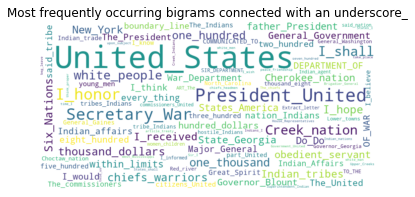

In [194]:
from operator import itemgetter

# setup and score the bigrams using the raw frequency
finder = BigramCollocationFinder.from_words(flattened_docs)
bigram_measures = BigramAssocMeasures()
scored = finder.score_ngrams(bigram_measures.raw_freq)

# sort highest to lowest based on the score
scoredList = sorted(scored, key=itemgetter(1), reverse=True)
 
# load dictionary
word_dict = {}
 
listLen = len(scoredList)

# set the dictionary key to the scored value
for i in range(listLen):
    word_dict['_'.join(scoredList[i][0])] = scoredList[i][1]

# set word cloud parameters and plot the word cloud
WC_height = 500
WC_width = 1000
WC_max_words = 100
 
wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width, background_color="white")
 
wordCloud.generate_from_frequencies(word_dict)
 
plt.title('Most frequently occurring bigrams connected with an underscore_')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
#wordCloud.to_file("Bigram_Cloud_New.png")
plt.show()

### Trigram Collocate Cloud 

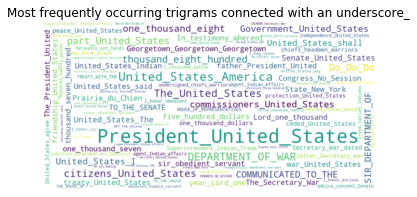

In [195]:
# setup and score the trigrams using the raw frequency
finder = TrigramCollocationFinder.from_words(flattened_docs)
trigram_measures = TrigramAssocMeasures()
scored = finder.score_ngrams(trigram_measures.raw_freq)

# sort highest to lowest based on the score
scoredList = sorted(scored, key=itemgetter(1), reverse=True)

# load dictionary 
word_dict = {}

listLen = len(scoredList)

# set the dictionary key to the scored value
for i in range(listLen):
    word_dict['_'.join(scoredList[i][0])] = scoredList[i][1]

# set word cloud parameters and plot the word cloud 
WC_height = 500
WC_width = 1000
WC_max_words = 100
 
wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width, background_color="white")
 
wordCloud.generate_from_frequencies(word_dict)
 
plt.title('Most frequently occurring trigrams connected with an underscore_')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
#wordCloud.to_file("Trigram_Cloud_New")
plt.show()

References:
1. https://avidml.wordpress.com/2017/08/03/word-cloud-with-frequently-occurring-bigrams-and-salient-bigrams/
3. https://www.pythonprogramming.in/how-to-create-a-word-cloud-from-a-corpus.html
4. https://medium.com/@nicharuch/collocations-identifying-phrases-that-act-like-individual-words-in-nlp-f58a93a2f84a

